# Tarea 2
__Curso:__ Aprendizaje Automático 2020 

__Programa:__ MIIIO/DIIIO/DISC

__Profesor:__ Gonzalo Ruz

__Ayudante:__ Anthony Cho

## Instrucciones
* La tarea es individual
* Por favor responder en este mismo notebook
* Renombrar el archivo agregando su nombre, por ejemplo tarea2_Tupper_Tudor.ipynb
* Subir el archivo al link de entrega Trabajo en webcursos que será habilitado
* __Fecha de entrega:__ lunes 31 de agosto, 23:55 hrs.

Los datos bankData.csv corresponden a una campaña de marketing dirigido (por teléfono) de un banco portugués. El objetivo de clasificación es poder predecir si el cliente va a tomar o no un depósito a plazo (variable “y” ubicada en la última columna de la tabla) en función de un conjunto de 18 atributos descritos en el archivo Atributos.pdf. Cargue el conjunto de datos (bankData.csv) en este notebook y responda las preguntas.

In [2]:
#Declaramos las librerias necesarias para esta tarea
import warnings
warnings.filterwarnings('ignore')

from pandas import read_csv, DataFrame, concat, get_dummies
import matplotlib.pyplot as plt
from numpy import arange
import random, math
random.seed(7)

%matplotlib inline

## activacion del estilo de ambiente de graficación
plt.style.use('classic')

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, LabelBinarizer  #para pasar categoricas a int para el arbol de decision
from sklearn.model_selection import train_test_split


## Metricas
from sklearn.metrics import classification_report, plot_confusion_matrix

## Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Graficacion de un arbol
from sklearn.tree import plot_tree

import pandas as pd

In [3]:
import pandas as pd
data = pd.read_csv('data/bankData.csv')

In [4]:
#data.describe(include='all')

Para las siguientes preguntas, considere las siguientes particiones de los datos

In [5]:
#primera partición
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,0:18],data['y'],
    test_size=0.3, random_state=0)

#segunda partición
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train,y_train,
    test_size=0.2, random_state=0)

## Pregunta 1
Usando `X_train2` (para entrenamiento) y `X_val` (para evaluación), explore una profundidad adecuada para un árbol de decisión tal que no sobreajuste. Luego, entrene un árbol de decisión (con la profundidad determinada previamente) usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. Grafique el árbol resultante. Señale qué le cuesta más predecir al clasificador: un cliente que si va a tomar un depósito a plazo o un cliente que no va a tomar un depósito a plazo. Justifique su respuesta.

## Respuesta:

### Primero pre-procesamiento de la data (Limpieza)
Como observamos la dataframe posee variables del tipo numericas como categoricas, lo cual es un problema para nuestro analisis. Esto debido a que los modelos que se implementarán a lo largo de la tarea, no estan adecuados para manejar datos del tipo categoricos.\
\
Además, como se puede apreciar a continuación existen ciertas variables que no aportan información relevante para el análisis, ya sea porque todos sus son iguales o poseen más desconocimiento que conocimiento, es decir su valor es "unknown".



In [6]:
#veamos los uniques de las variables education, default, housing, loan, contact, poutcome, y.

print(data.education.unique())
print(data.default.unique())
print(data.housing.unique())
print(data.loan.unique())
print(data.contact.unique())
print(data.poutcome.unique())
print(data.campaign.unique())
print(data['emp.var.rate'].unique())
print(data['cons.conf.idx'].unique())
print(data['cons.price.idx'].unique())
print(data.euribor3m.unique())
print(data.campaign.unique())
print(data['nr.employed'].unique())
print(data.y.unique())

['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
['no' 'unknown' 'yes']
['yes' 'no' 'unknown']
['no' 'unknown' 'yes']
['cellular' 'telephone']
['nonexistent' 'failure' 'success']
[ 2  4  1  3  6  7 27  5 12 14 10  8 11 13  9 15 16 18 17 22 19 23 24 35
 29]
[-1.8  1.1  1.4 -0.1 -1.1 -2.9 -1.7 -3.4 -3.  -0.2]
[-46.2 -36.4 -41.8 -42.  -37.5 -42.7 -36.1 -34.8 -50.  -40.8 -49.5 -38.3
 -29.8 -26.9 -34.6 -47.1 -39.8 -33.6 -50.8 -31.4 -30.1 -40.3 -40.  -40.4
 -33.  -45.9]
[92.893 93.994 94.465 93.2   94.199 93.918 93.444 93.369 92.843 92.963
 94.601 94.027 92.379 92.431 93.749 93.075 94.055 92.469 94.767 92.201
 92.649 94.215 93.876 93.798 92.713 92.756]
[1.313 4.855 4.962 4.959 4.191 0.884 0.879 4.153 4.958 4.968 4.859 4.963
 4.957 4.965 4.961 0.639 4.967 4.864 4.856 1.299 4.86  1.687 4.865 1.268
 4.12  1.334 0.977 1.344 0.899 1.327 4.592 4.97  1.26  4.966 0.77  4.866
 4.964 4.857 0.886 0.739 0.654 1.405 1.281 4.96  0.754 1.291

In [7]:
#Veamos cuantos datos desconocidos hay en cada una de estas variables que poseen datos desconocidos
aux=['education','default','housing','loan','contact','poutcome','y']
for i in aux:
    print(data.groupby(i)[i].count())
    print('\n')

education
basic.4y                429
basic.6y                228
basic.9y                574
high.school             921
illiterate                1
professional.course     535
university.degree      1264
unknown                 167
Name: education, dtype: int64


default
no         3315
unknown     803
yes           1
Name: default, dtype: int64


housing
no         1839
unknown     105
yes        2175
Name: housing, dtype: int64


loan
no         3349
unknown     105
yes         665
Name: loan, dtype: int64


contact
cellular     2652
telephone    1467
Name: contact, dtype: int64


poutcome
failure         454
nonexistent    3523
success         142
Name: poutcome, dtype: int64


y
no     3668
yes     451
Name: y, dtype: int64




In [8]:
aux=['poutcome','previous','default','pdays','day_of_week','month'] 
for i in aux:
    data=data.drop(i, axis=1)
data

age          education  housing     loan    contact  duration  campaign  \
0      30           basic.9y      yes       no   cellular       487         2   
1      39        high.school       no       no  telephone       346         4   
2      25        high.school      yes       no  telephone       227         1   
3      38           basic.9y  unknown  unknown  telephone        17         3   
4      47  university.degree      yes       no   cellular        58         1   
...   ...                ...      ...      ...        ...       ...       ...   
4114   30           basic.6y      yes      yes   cellular        53         1   
4115   39        high.school      yes       no  telephone       219         1   
4116   27        high.school       no       no   cellular        64         2   
4117   58        high.school       no       no   cellular       528         1   
4118   34        high.school      yes       no   cellular       175         1   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0             -1.8          92.893          -46.2      1.313       5099.1  no  
1              1.1          93.994          -36.4      4.855       5191.0  no  
2              1.4          94.465          -41.8      4.962       5228.1  no  
3              1.4          94.465          -41.8      4.959       5228.1  no  
4             -0.1          93.200          -42.0      4.191       5195.8  no  
...            ...             ...            ...        ...          ...  ..  
4114           1.4          93.918          -42.7      4.958       5228.1  no  
4115           1.4          93.918          -42.7      4.959       5228.1  no  
4116          -1.8          92.893          -46.2      1.354       5099.1  no  
4117           1.4          93.444          -36.1      4.966       5228.1  no  
4118          -0.1          93.200          -42.0      4.120       5195.8  no  

[4119 rows x 13 columns]

## Justificacion
Al observar el archivo Atributos.pdf , el cual igualmente se puede apreciar de manera original en: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing (University of California Irvine) podemos entender mejor que representa cada una de las variables. Es por ello que se deciden eliminar las siguientes variables para este análisis.
- Default es eliminada, pues solo tiene un dato que es "yes" dentro de 4119, el resto son "unknow" o "no", por lo que realmente no aporta como un elemento de diferenciador al momento de predecir.
- Poutcome: Solo 596 datos aportan informacion, es decir un 14.46%. Además la gran mayoria son "nonexistent" (3523 de un total de 4119) luego no aporta al analisis.

Cabe destacar que las siguientes variables son eliminadas, debido a que tiene relación con la última vez que el posible cliente fue contactado.

- Previous: Las veces que fue contactado previamente a la campaña actual. Además solo existen 596 casos donde el valor es distinto de 0, es decir fue llamado antes. Como es 14.5% del total de la data se elimina.
- Month: Representa el mes del ultimo contacto.
- Day_of_week: El dia de la semana donde se realizó el último contacto.
- Pdays: Numero de dias desde el último contacto, información que no se considera relevante para el estudio

Por último, observemos los atributos con los cuales se trabajará:

En primer lugar notemos los atributos que generan un perfil de cliente:

- Age: Representa la edad del potencial cliente
- Education: Entrega información sobre el nivel educacional.
- Housing: Representa si es que el cliente posee un prestamo para su vivienda. 
- Loan: Posee un prestamo personal.
- Contact: Por que medio fue contactado.
- Duration: Cuanto duró la última llamada que se le efectuó a este cliente, si bien se recomienda que este atributo no sea considerado si el proposito es predecir "y", puesto a que no se puede tener conocimiento de la duración de la llamada hasta que se llama al potencial cliente. Esta variable igualmente es considerada en este estudio, pues se considera que tener un conocimiento sobre el efecto de la duracion en la llamada en la decision del cliente es favorecedor para la empresa (banco), ya que de este modo pueden saber cuando un cliente va bien en caminado hacia una aceptación de la propuesta bancaria, dependiendo del tiempo empleado en la llamada.
- Campaign: Es la cantidad de veces que fue llamado el cliente durante esta campaña

Luego Observamos aquellos atributos que estan relacionados con el mundo económico, es decir que representan el contexto económico del momento.

- Emp.var.rate: Es la variacion de la tasa de empleo.
- Cons.price.idx: índice de precios al consumidor.
- Cons.conf.idx: índice de confianza del consumidor.
- Euribor3m: Euribor rate 3 meses, es un indicador sobre los tipos de interes al momento de realizar prestamos de fondos entre bancos de la zona europea.
- nr.employed: Numero de empleados.

Y finalmente y, que representa si el cliente ópto o no por tomar el depósito a plazo.


In [9]:
#La variable que establece el numero de empleados se encuentra con decimales, como lo observamos previamente.
#No obstante podemos ver que es de caracter ordinal, por lo cual se le aplican valores del 0 al 10, correspondientemente.
data['nr.employed'].astype('category')
le = preprocessing.LabelEncoder()
data['nr.employed'] = le.fit_transform(data['nr.employed'])
data

age          education  housing     loan    contact  duration  campaign  \
0      30           basic.9y      yes       no   cellular       487         2   
1      39        high.school       no       no  telephone       346         4   
2      25        high.school      yes       no  telephone       227         1   
3      38           basic.9y  unknown  unknown  telephone        17         3   
4      47  university.degree      yes       no   cellular        58         1   
...   ...                ...      ...      ...        ...       ...       ...   
4114   30           basic.6y      yes      yes   cellular        53         1   
4115   39        high.school      yes       no  telephone       219         1   
4116   27        high.school       no       no   cellular        64         2   
4117   58        high.school       no       no   cellular       528         1   
4118   34        high.school      yes       no   cellular       175         1   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0             -1.8          92.893          -46.2      1.313            6  no  
1              1.1          93.994          -36.4      4.855            8  no  
2              1.4          94.465          -41.8      4.962           10  no  
3              1.4          94.465          -41.8      4.959           10  no  
4             -0.1          93.200          -42.0      4.191            9  no  
...            ...             ...            ...        ...          ...  ..  
4114           1.4          93.918          -42.7      4.958           10  no  
4115           1.4          93.918          -42.7      4.959           10  no  
4116          -1.8          92.893          -46.2      1.354            6  no  
4117           1.4          93.444          -36.1      4.966           10  no  
4118          -0.1          93.200          -42.0      4.120            9  no  

[4119 rows x 13 columns]

Basandonos en el codigo del ayudante Anthony C., expuesto en ayudantia. Transformamos las variables categoricas a numericas.

In [10]:
aux=['education','housing','loan','contact','nr.employed','y']

## Instancia y ajuste del encoding por columna
OHEncondings = {} 
for label in aux:
    OHEncondings[label] = LabelBinarizer().fit(data[label])

## Duplicado del dataframe para encoding
df = data.copy()

## Aplicar encoding
for label in OHEncondings:
    
    ## Encoding de una columna
    encoding = OHEncondings[label]
    
    if encoding.y_type_ == 'binary':
        
        ## Aplicar binary encoding
        colname = ['{}_{}'.format(label, encoding.classes_[-1])]
        temp = encoding.transform(data[label])
    else:
        
        ## Aplicar multiple clase encoding
        colname = ['{}_{}'.format(label, encoding.classes_[k]) for k in range(len(encoding.classes_))]
        temp = encoding.transform(data[label])
    
    ## Convertir el encoding en dataframe
    temp = DataFrame(data=temp, columns=colname)
    
    ## Agregar las columnas codificadas
    for col in temp.columns:
        df[col] = temp[col]

In [11]:
#Borramos las columnas originales de las variables categoricas
aux=['education','housing','loan','contact','nr.employed','y']
for i in aux:
    df=df.drop(i, axis=1)
#Observamos las columanas que quedaron
df.columns

Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'nr.employed_0', 'nr.employed_1', 'nr.employed_2',
       'nr.employed_3', 'nr.employed_4', 'nr.employed_5', 'nr.employed_6',
       'nr.employed_7', 'nr.employed_8', 'nr.employed_9', 'nr.employed_10',
       'y_yes'],
      dtype='object')

In [12]:
#Borremos aquellas columnas que no aportan informacion, debido a que el valor de la variable es desconocido. "unknown"
aux=['education_unknown','housing_unknown','loan_unknown']
for i in aux:
    df=df.drop(i,axis=1)
df

age  duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0      30       487         2          -1.8          92.893          -46.2   
1      39       346         4           1.1          93.994          -36.4   
2      25       227         1           1.4          94.465          -41.8   
3      38        17         3           1.4          94.465          -41.8   
4      47        58         1          -0.1          93.200          -42.0   
...   ...       ...       ...           ...             ...            ...   
4114   30        53         1           1.4          93.918          -42.7   
4115   39       219         1           1.4          93.918          -42.7   
4116   27        64         2          -1.8          92.893          -46.2   
4117   58       528         1           1.4          93.444          -36.1   
4118   34       175         1          -0.1          93.200          -42.0   

      euribor3m  education_basic.4y  education_basic.6y  education_basic.9y  \
0         1.313                   0                   0                   1   
1         4.855                   0                   0                   0   
2         4.962                   0                   0                   0   
3         4.959                   0                   0                   1   
4         4.191                   0                   0                   0   
...         ...                 ...                 ...                 ...   
4114      4.958                   0                   1                   0   
4115      4.959                   0                   0                   0   
4116      1.354                   0                   0                   0   
4117      4.966                   0                   0                   0   
4118      4.120                   0                   0                   0   

      ...  nr.employed_2  nr.employed_3  nr.employed_4  nr.employed_5  \
0     ...              0              0              0              0   
1     ...              0              0              0              0   
2     ...              0              0              0              0   
3     ...              0              0              0              0   
4     ...              0              0              0              0   
...   ...            ...            ...            ...            ...   
4114  ...              0              0              0              0   
4115  ...              0              0              0              0   
4116  ...              0              0              0              0   
4117  ...              0              0              0              0   
4118  ...              0              0              0              0   

      nr.employed_6  nr.employed_7  nr.employed_8  nr.employed_9  \
0                 1              0              0              0   
1                 0              0              1              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              1   
...             ...            ...            ...            ...   
4114              0              0              0              0   
4115              0              0              0              0   
4116              1              0              0              0   
4117              0              0              0              0   
4118              0              0              0              1   

      nr.employed_10  y_yes  
0                  0      0  
1                  0      0  
2                  1      0  
3                  1      0  
4                  0      0  
...              ...    ...  
4114               1      0  
4115               1      0  
4116               0      0  
4117               1      0  
4118               0      0  

[4119 rows x 31 columns]

In [13]:
#Usemos la nueva dataframe: (Manteniendo lo establecido por el enunciado de la pregunta)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,0:30],df['y_yes'],
    test_size=0.3, random_state=0)

#segunda partición
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train,y_train,
    test_size=0.2, random_state=0)

In [14]:
# #primero estandariazamos los datos
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)
X_train2 = scale.transform(X_train2)
X_val = scale.transform(X_val)

In [15]:
#Creamos la funcion vista en ayudantia para graficar las features 
def plot_feature_importances(model, features, width=10, height=6):
    
    ## Numero de features
    n_features = len(features)
    
    ## Grafica de feature importance
    plt.figure(figsize=(width, height))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [16]:
#Vemos los size de cada set de interes
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train2.shape[0], X_val.shape[0], X_test.shape[0]))

Size of training set: 2306   size of validation set: 577   size of test set: 1236



In [17]:
#Hacemos Naive way of GridSearch, donde no usamos GridSearchCV, pues usa crossvalidation
best_score = 0 #Variable axuliar para guardar el mejor score y asi obtener los mejores param

#Parametro criterion
crit=['gini','entropy']

#Parametro min_samples_split
mns=arange(2,230) #Es una grid de numeros que conocemos, en este caso una arreglo del 2 al 230 pues es practicamente el 10% del size del train2

#Parametro profundidad
depth=arange(1,11) #Usamos hasta 10, pues tras pruebas este es el valor mas alto que se alcanzo

for aux1 in crit:
    for aux2 in mns:
        for aux3 in depth:
            #Hacemos el train
            clf = DecisionTreeClassifier(criterion=aux1, min_samples_split=aux2, max_depth=aux3)
            clf.fit(X_train2, y_train2)
            #Evaluamos
            score=clf.score(X_val, y_val)
            #Nos quedamos con el mejor score
            if score > best_score:
                    best_score = score
                    best_parameters = {'criterion': aux1, 'min_samples_split': aux2, 'max_depth': aux3}
## Imprimir los parametros del mejor modelo evaluado
print('Best parameters: {}'.format(best_parameters))

Best parameters: {'criterion': 'gini', 'min_samples_split': 16, 'max_depth': 9}


gini (Train): 0.9528
gini (validation): 0.9619


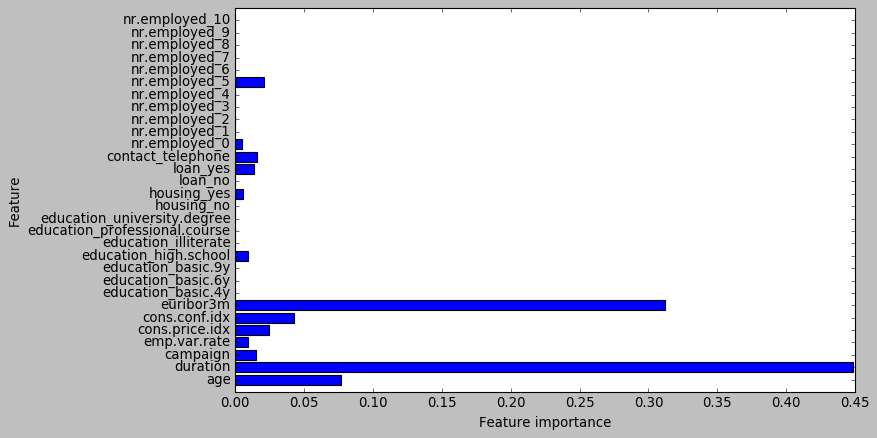

In [18]:
#Usamos los mejores parametros y evaluamos en el validation set
model = DecisionTreeClassifier(**best_parameters).fit(X=X_train, y=y_train)

## Score del conjunto de train
print('{} (Train): {:.4f}'.format(model.criterion, model.score(X=X_train, y=y_train)))

## Score del conjunto validacion.
print('{} (validation): {:.4f}'.format(model.criterion, model.score(X=X_val, y=y_val)))

## Grafica de feature importances
plot_feature_importances(model, df.columns[:-1])

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1114
           1       0.42      0.37      0.39       122

    accuracy                           0.89      1236
   macro avg       0.68      0.66      0.67      1236
weighted avg       0.88      0.89      0.88      1236



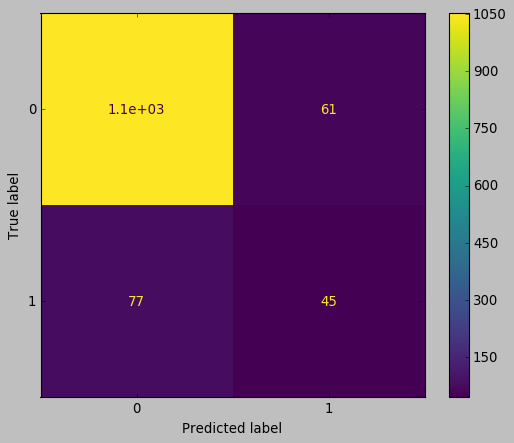

In [19]:
## Reporte de predicciones
prediccion = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=prediccion))

## Grafica de matriz de confusion
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [28]:
## Grafica del arbol

plt.figure(figsize=(40, 24), dpi=300)
plot_tree(decision_tree=model, 
          feature_names=df.columns[:-1],
          fontsize=8, filled=True);
plt.savefig('Classification_tree.png', bbox_inches='tight')

### Respuesta:
En primer lugar observamos como buscamos los mejores parametros para el Decision Tree Classifier, sin que este se sobreajuste. Para ello utilizamos el X_train2 y evaluamos los scores en el set de validacion.

Es así como observamos que los mejores parametros son:
{'criterion': 'gini', 'min_samples_split': 16, 'max_depth': 9}
Lo que quiere decir que para el caso de min_samples_split, el minimo numero de muestras requeridas para dividir un nodo interno es de 16. Y por otro lado que la máxima profundidad del árbol es 9.

Así mismo aprovechamos de graficar la importancia de cada una de las variables por medio de la funcion presentada por Anthony C. durante la ayudantia. Ya que esto nos da una idea sobre que variables deberian visualizarse en nuestro árbol. 

Luego tomamos estos "mejores" parametros y los aplicamos en el modelo y lo fiteamos con el X_train, para asi posteriormente obtener la prediccion del X_test.

Rápidamente al observar el classification_report y la Matriz de confusión vemos como el porcentaje de clasificaciones correctas, es decir el accuracy, al evaluar el modelo con X_test es de 89%.

Si bien esto pareceria un buen indicador para el modelo, es cuestionable, ya que logra predecir correctamente la basta mayoria de los casos que el cliente no va optar por la oferta del banco, lo cual se puede observar en la Matriz de confusión en la esquina superior izquierda, que refleja los clientes predecidos que no aceptan y que en la realidad no lo hacen. No obstante para predecir que el cliente sí optará por la propuesta el modelo no alcanza el mismo desempeño, pues como se observa hay 77 casos donde predice que no aceptará donde realmente si lo hace, y a su vez hay 61 instancias donde predice que sí aceptará pero en realidad no lo hace.

Este última cualidad del modelo se observa por medio de otro indicador obtenido a través del classification_report, el cual es la precisión, pues esta cuantifica el numero de positivos que realmente pertenece a esa clase positiva. Y como podemos ver la precisión para la clase "0", es decir que no acepta es de 93%, pero para el caso de la clase "1", es decir que si acepta, es tan solo de 42%. 

Gracias a lo expuesto anteriormente es que se puede concluir que al clasificador le cuesta más predecir un cliente que si va a tomar el depósito a plazo ("1") que uno que no va a tomar la oferta ("0").

El codigo continua con la gráfica del árbol, cabe destacar que para ahorrar tiempo se ha incluido el árbol obtenido y que fue utilizado para el desarrollo de la pregunta 6, dentro del zip entregado, el archivo posee el nombre de Arbol_analisis.png

## Pregunta 2
En base al árbol resultante. Cuál es el atributo más importante para este problema de clasificación. Qué atributos no contribuyen (son irrelevantes) para este problema de clasificación.

### Respuesta
Para resolver esta pregunta basta con observar la gráfica del arbol obtenido previamente (archivo: Arbol_Analisis.png).

Ya que como lo expresó el profesor en clases, es normal que en la gráfica del árbol no esten todas las variables (atributos) representadas, y que su ausencia se debe a que no tienen un real aporte hacia la predicción. Así mismo estableció que la raíz es aquel atributo o variable con más poder discriminatorio. 

Teniendo en consideración lo anterior, el atributo más relavante es "Euribor3m", debido a que este es la raíz del árbol. Esto hace sentido, pues esta variable hace referencia al indicador Euribor cada 3 meses, y este indicador refleja el promedio de los tipos de interes a los que se ofrecen prestar fondos a otros bancos de la "Eurozone", la cual incluye a Portugal. Es decir es un indicador del promedio de los tipos de interes, lo cual afecta directamente al momento de realizar un prestamo con deposito a plazo, pues es parte del contexto económico del momento.

Por otro lado los atributos que son irrelevantes para este problema de clasificación, los cuales no se visualan en el árbol gráficado son los siguientes:

Niveles de educación: education_basic.4y,education_basic.6y, education_basic.9y, education_illiterate, education_professional.course.

Los números de empleados a excepción de nr.employed_3, el cual posee como valor original 5017.5 empleados, cabe destacar que se cree que son 5018 empleados que se poseen, pues no se puede tener "medios" empleados.

De igual modo cabe mencionar a aquellos atributos que sí son considerados dentro del árbol (y que se usarán en la pregunta 6):

'euribor3m','duration','emp.var.rate','loan_yes','housing_yes','cons.price.idx','cons.conf.idx','campaign','age','education_high.school','contact_telephone','nr.employed_3')

## Pregunta 3
Considere un clasificador Random Forest. Usando `X_train2` y `X_val` utilice una estrategia de búsqueda de hiperparámetros, para determinar el valor de `n_estimators` (cantidad de árboles) y `max_features` (la cantidad de características a considerar al buscar la mejor división o split) con tal que el model no sobreajuste. Luego, entrene un random forest (con los hiperparámetros determinados previamente) usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. Obtiene mejores resultados que el árbol de decisión de la pregunta 1?

### Respuesta

In [20]:
#Hacemos Naive way of GridSearch, donde no usamos GridSearchCV, pues usa crossvalidation
best_score = 0 #Variable axuliar para guardar el mejor score y asi obtener los mejores param de interes: En este caso n_estimators y max_features

#Parametro criterion
crit=['gini','entropy'] #Checkeamos si es que realmente sigue siendo el mismo mejor criterion

#Parametro min_samples_split

#Usamos 16, debido a que es lo que nos dio en la pregunta 1. Sin embargo cabe mencionar que se intentó iterar con
#un arreglo, no obstante el tiempo de ejecución era muy elevado superando los 20 minutos.
mns=[16]

#Parametro profundidad
depth=[9]#5 #Usamos 8 ya que es el valor obtenido previamente y ademas se repitio cuando se hicieron pruebas para encontrar los parametros de interes de esta pregunta.

#Parametro n_estimators, es decir numero de arboles

estim= arange(30,120)#Se probo con hasta 217, y 117 continuo siendo la mejor opcion

#Parametro max_features
max_features=['auto', 'sqrt', 'log2']

for aux2 in mns:
    for aux3 in depth:
        for aux1 in crit:
            for aux5 in max_features:
                for aux4 in estim:
                    #Hacemos el train
                    clf = RandomForestClassifier(criterion=aux1, min_samples_split=aux2, max_depth=aux3, n_estimators=aux4, max_features=aux5, random_state=0, n_jobs=-1)
                    clf.fit(X_train2, y_train2)
                    #Evaluamos
                    score=clf.score(X_val, y_val)
                    #Nos quedamos con el mejor score
                    if score > best_score:
                        best_score = score
                        best_parameters = {'criterion': aux1, 'min_samples_split': aux2, 'max_depth': aux3, 'n_estimators': aux4, 'max_features': aux5, 'random_state': 0, 'n_jobs': -1}
## Imprimir los parametros del mejor modelo evaluado
print('Best parameters: {}'.format(best_parameters))

Best parameters: {'criterion': 'entropy', 'min_samples_split': 16, 'max_depth': 9, 'n_estimators': 117, 'max_features': 'auto', 'random_state': 0, 'n_jobs': -1}


              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1114
           1       0.53      0.28      0.37       122

    accuracy                           0.90      1236
   macro avg       0.73      0.63      0.66      1236
weighted avg       0.89      0.90      0.89      1236



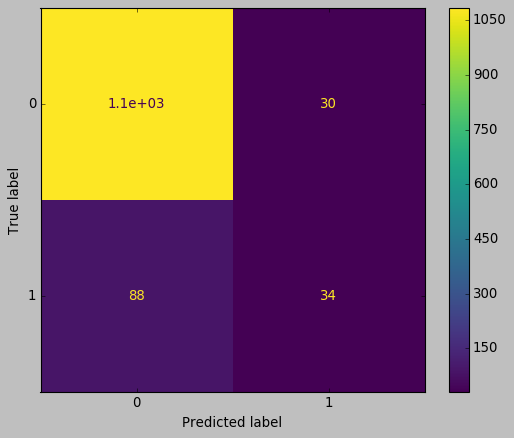

In [21]:
#Usamos los mejores parametrosy fiteamos con el train set
model = RandomForestClassifier(**best_parameters).fit(X=X_train, y=y_train)
## Reporte de predicciones
prediccion = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=prediccion))

## Grafica de matriz de confusion
plot_confusion_matrix(model, X_test, y_test)
plt.show()

## Respuesta:
Como podemos observar primero hacemos un Naive GridSearch, para buscar los mejores parametros, en este caso la búsqueda se centra en "n_estimators" y "max_features", para lo cual dejamos fijado "min_samples_split" y "max_depth", esto debido a que usaremos los indicadores que se obtuvieron en la primera pregunta, ya que si see iteraba con estos parametros igualmente el tiempo de ejecución era muy elevado. No obstante, cabe destacar que sí se verificó si es que el criterion cambiaba, lo cual se discutirá más adelante.

Para realizar este gridserach usamos X_train2 y X_val, donde entrenamos con el primero y validamos el score con el segundo set.

Al observar el output, vemos como los mejores parametros de interes son los siguientes:
'criterion': 'entropy', 'n_estimators': 117, 'max_features': 'auto'.
Se denota que el criterio a cambiado de gini a entropy, y así mismo se relevan los mejores paremetros solicitados por la pregunta, en este caso se clarifica que el número de árboles a realizar es de 117 y con la max_feauture de "auto", lo cual significa que la la cantidad de caracteristicas a considerar al buscar la mejor division, será de la siguiente forma max_features=sqrt(n_features), donde n_feautures, son el número de features cuando se aplica el fit sobre el modelo.

Una vez ya teniendo estos parametros, entrenamos el modelo de random forest usando el conjunto X_train y evaluamos con X_test. Para observar los resultados usamos una matriz de confusion y su classification_report.

Rápidamente vemos como el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test, es de 90%, lo cual vemos por medio del accuracy del modelo. 

Si bien es un aumento de solo 1% en accuracy con respecto al arbol de decisión de la pregunta 1. Cabe mencionar que gracias a este modelo existe un aumento del 11% en la precisión de la clase 1, la cual es la clase de mayor interes dentro este análisis, pues son los clientes que sí aceptan la oferta del banco. Por lo que, un aumento en la precisión de esta clase es sumamente relevante, ya que el numero de positivos que realmente pertenece a esa clase positiva han aumentando en un 11%, para la clase 1 (Si acepta la oferta del banco). No obstante, cabe mencionar este modelo posee un 92% en la precisión para la clase 0, es decir empeora 1% con respecto al modelo la pregunta 1.

Es por este motivo que se concluye que el modelo de Random Forest aún tiene más complicaciones para predecir a aquel cliente que sí opta por la oferta del banco que aquel que no, pero a su vez se afirma que sí obtiene mejores resultados que el árbol de decisión expuesto en la pregunta 1, ya que como se visualizó alcanza una mayor accuracy y a su vez aumenta la precisión en la variable de mayor interes para este estudio.

## Pregunta 4
Siga la misma idea de la pregunta 3, pero ahora considere un SVM para clasificación, i.e., `SVC(kernel='rbf', C=A, gamma=B)`. En este caso la búsqueda de los hiperparámetros corresponde a encontrar valores apropiados para A y B. Luego, entrene un SVC (con los hiperparámetros determinados previamente) usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. Obtiene mejores resultados que el árbol de decisión de la pregunta 1?  

### Respuesta

In [31]:
#Hacemos Naive way of GridSearch, donde no usamos GridSearchCV, pues usa crossvalidation
best_score = 0 #Variable axuliar para guardar el mejor score y asi obtener los mejores param de interes: En este caso C y Gamma

#Parametro C
random.seed(0) #Para que no cambie el arreglo c
c=[]
for i in range (200):
    aux=random.uniform(1e-13,100) #hacemos que la variable auxiliar sea un valor random uniform entre practicamente 0 y 100
    c.append(aux)

#Parametro gamma
gam=['scale', 'auto']

for aux1 in gam:
    for aux2 in c:
        #Hacemos el train
        clf = SVC(gamma=aux1, C=aux2, random_state=0)
        clf.fit(X_train2, y_train2)
        #Evaluamos
        score=clf.score(X_val, y_val)
        #Nos quedamos con el mejor score
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': aux1, 'C': aux2, 'random_state': 0}
## Imprimir los parametros del mejor modelo evaluado
print('Best parameters: {}'.format(best_parameters))   

Best parameters: {'gamma': 'scale', 'C': 4.52340678656133, 'random_state': 0}


(Train): 0.9483
(Validation): 0.9515
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1114
           1       0.46      0.35      0.40       122

    accuracy                           0.90      1236
   macro avg       0.70      0.65      0.67      1236
weighted avg       0.88      0.90      0.89      1236



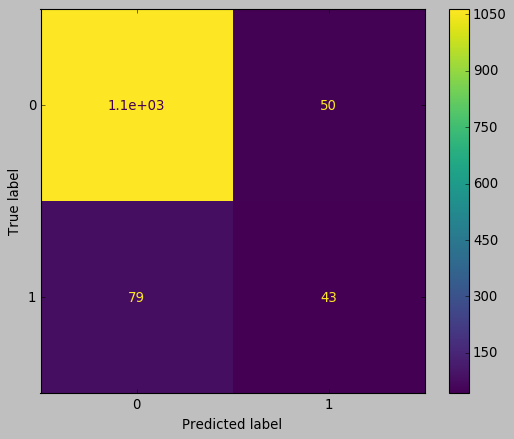

In [32]:
#Usamos los mejores parametros y fiteamos con el train set
model = SVC(**best_parameters).fit(X=X_train, y=y_train)

## Score del conjunto de entrenamiento
print('(Train): {:.4f}'.format(model.score(X=X_train, y=y_train)))

## Score del conjunto validation.
print('(Validation): {:.4f}'.format(model.score(X=X_val, y=y_val)))

## Reporte de predicciones
prediccion = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=prediccion))

## Grafica de matriz de confusion
plot_confusion_matrix(model, X_test, y_test)
plt.show()

## Respuesta
Realizamos lo mismo que en la pregunta anterior pero en este caso cambiamos el clasificador a utilizar, en este caso usaremos el dado como ejemplo, es decir SVC, con parametro del kernel default. Por lo que los mejores parametros a buscar serán para el parametro C y gamma.

En primer lugar usamos un C random uniforme entre los valores de 0 y 100, con 200 numeros. Se utilizo uniform, puesto a que no se tiene conocimiento certero del efecto de C en el clasificador, por lo que al implementar una distribucion uniforme se le otorga el mismo peso a todas las posibles C's.

Asi mismo para cada uno de estos C's, se testeo el score usando gamma igual a scale y auto.

Tras finalizar la busqueda usando el conjunto X_train2 para fitear y el X_val para validar, se llega al siguiente output:
{'gamma': 'scale', 'C': 4.52340678656133}, donde C es el parametro de regularizacion y gamma es el coeficiente del kernel, en este caso es Scale.

Al implementar estos "mejores" parametros y fitear el modelo con X_train para posteriormente evaluar en X_test, por medio del classification report y la matriz de confusión se puede ver que el clasificador tiene un 90% de accuracy, es decir el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test es del noventa por ciento. Lo cual en comparación con el árbol de decisión de la pregunta 1, es un 1% mejor.

Por otro lado, en el caso de la precisión para la clase 1, vemos como existe un aumento de 4%, y para la clase 0 se mantiene igual en 93%.

Tras observar esta información, se infiere que este modelo igualmente posee mayor complicación para predecir a los clientes clase 1, es decir que sí aceptan la propuesta por el banco. De igual modo se deduce que este clasificador es mejor que el árbol de decisión de la pregunta 1, pero levemente, ya que la diferencia solo es de un por ciento en el accuracy, y de un 4% en la precisión para la clase 1.

## Pregunta 5 
Entrene un naive Bayes usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`.

### Respuesta

In [34]:
from sklearn.naive_bayes import GaussianNB
from numpy import where, array, linspace

              precision    recall  f1-score   support

           0       1.00      0.05      0.10      1114
           1       0.10      1.00      0.19       122

    accuracy                           0.14      1236
   macro avg       0.55      0.53      0.14      1236
weighted avg       0.91      0.14      0.10      1236



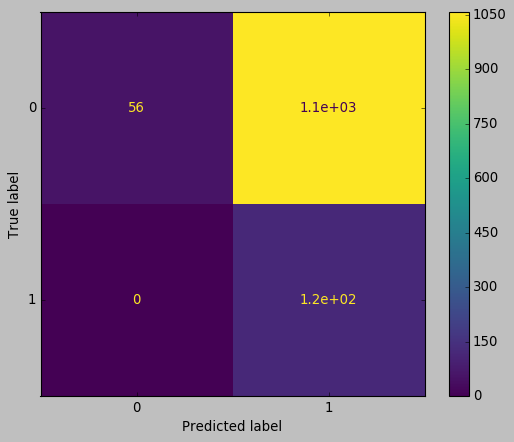

In [35]:
#Probamos Naive Bayes completamente default
## Ajuste del modelo
model = GaussianNB().fit(X_train, y_train)

## Prediccion con test data
prediccion = model.predict(X_test)

## Reporte de metricas
print(classification_report(y_pred=prediccion, y_true=y_test))

## Matriz de confusion
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test)
plt.show()

## Respuesta:
Ejecutamos el modelo de manera completamente default.
Y obtuvimos el classification report y la matriz de confusion, rápidamente se observa que el modelo de Naive Bayes tiene un comportamiento donde clasifica practicamente todas las entradas como clase 1, a excepción de 56. 

Esto genera un mal desempeño, ya que como observamos la accuracy es de solo un 14%, es decir el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test es sumamente bajo en comparación con los otros modelos expuestos en esta tarea. 

De igual modo al ver la matriz de confusión se denota con más claridad el comportamiento, se ve como predice que casi todas las entradas son del tipo clase 1. Lo cual no es favorecedor, pues como se observa en la matriz la mayoria de los datos estan en los cuadrantes no deseados, es decir donde el clasificador se equivoca.

Ya habiendo cumplido con lo solicitado por la pregunta de la tarea, se expande un poco el análisis y buscamos los mejores parametros para el var_smoothing para ver cuanto mejora el modelo.

In [36]:
#Hacemos Naive way of GridSearch, donde no usamos GridSearchCV, pues usa crossvalidation
best_score = 0 #Variable axuliar para guardar el mejor score y asi obtener los mejores param de interes: En este var_smoothing

#Parametro var_smoothing
nb=linspace(1e-18,2, num=1000)

for aux1 in nb:
    #Hacemos el train
    clf = GaussianNB(var_smoothing=aux1)
    clf.fit(X_train2, y_train2)
    #Evaluamos
    score=clf.score(X_val, y_val)
    #Nos quedamos con el mejor score
    if score > best_score:
        best_score = score
        best_parameters = {'var_smoothing': aux1}
## Imprimir los parametros del mejor modelo evaluado
print('Best parameters: {}'.format(best_parameters))

Best parameters: {'var_smoothing': 0.058058058058058054}


              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1114
           1       0.39      0.59      0.47       122

    accuracy                           0.87      1236
   macro avg       0.67      0.74      0.70      1236
weighted avg       0.90      0.87      0.88      1236



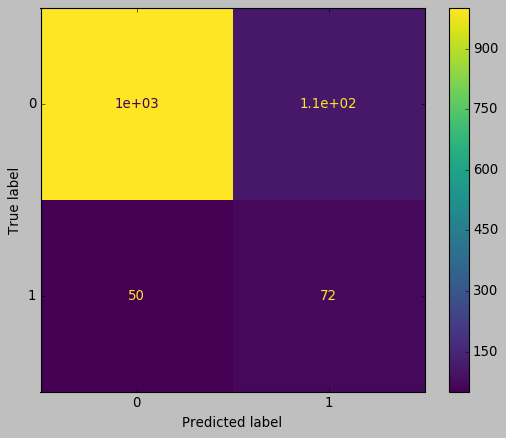

In [37]:
## Ajuste del modelo
model = GaussianNB(**best_parameters).fit(X_train, y_train)

## Prediccion con test data
prediccion = model.predict(X_test)

## Reporte de metricas
print(classification_report(y_pred=prediccion, y_true=y_test))

## Matriz de confusion
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test)
plt.show()

## Respuesta (extra)
Tras realizar la misma metodologia que los modelos pasados de realizar una naive gridsearch con el set de X_train2 para fiteo y X_val para validacion, se encuentra el mejor valor para var_smoothing, siendo este 0.058 aproximadamente.
Esto genera que el modelo mejore increiblemente, llegando a una accuracy del 87%, aunque aún se mantiene por debajo del desempeño de otros clasificadores expuestos anteriormente.

## Pregunta 6
Entrene un naive Bayes usando el conjunto de entrenamiento `X_train`, pero sólo utilizando los atributos que aparecen en el árbol obtenido en la pregunta 1. Entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. ¿Mejora el desempeño al comparar con lo obtenido en la pregunta 5?

### Respuesta

In [55]:
#Hacemos una copia para dejar intecto con lo que trabajamos
df2=df.copy()
df2

age  duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0      30       487         2          -1.8          92.893          -46.2   
1      39       346         4           1.1          93.994          -36.4   
2      25       227         1           1.4          94.465          -41.8   
3      38        17         3           1.4          94.465          -41.8   
4      47        58         1          -0.1          93.200          -42.0   
...   ...       ...       ...           ...             ...            ...   
4114   30        53         1           1.4          93.918          -42.7   
4115   39       219         1           1.4          93.918          -42.7   
4116   27        64         2          -1.8          92.893          -46.2   
4117   58       528         1           1.4          93.444          -36.1   
4118   34       175         1          -0.1          93.200          -42.0   

      euribor3m  education_basic.4y  education_basic.6y  education_basic.9y  \
0         1.313                   0                   0                   1   
1         4.855                   0                   0                   0   
2         4.962                   0                   0                   0   
3         4.959                   0                   0                   1   
4         4.191                   0                   0                   0   
...         ...                 ...                 ...                 ...   
4114      4.958                   0                   1                   0   
4115      4.959                   0                   0                   0   
4116      1.354                   0                   0                   0   
4117      4.966                   0                   0                   0   
4118      4.120                   0                   0                   0   

      ...  nr.employed_2  nr.employed_3  nr.employed_4  nr.employed_5  \
0     ...              0              0              0              0   
1     ...              0              0              0              0   
2     ...              0              0              0              0   
3     ...              0              0              0              0   
4     ...              0              0              0              0   
...   ...            ...            ...            ...            ...   
4114  ...              0              0              0              0   
4115  ...              0              0              0              0   
4116  ...              0              0              0              0   
4117  ...              0              0              0              0   
4118  ...              0              0              0              0   

      nr.employed_6  nr.employed_7  nr.employed_8  nr.employed_9  \
0                 1              0              0              0   
1                 0              0              1              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              1   
...             ...            ...            ...            ...   
4114              0              0              0              0   
4115              0              0              0              0   
4116              1              0              0              0   
4117              0              0              0              0   
4118              0              0              0              1   

      nr.employed_10  y_yes  
0                  0      0  
1                  0      0  
2                  1      0  
3                  1      0  
4                  0      0  
...              ...    ...  
4114               1      0  
4115               1      0  
4116               0      0  
4117               1      0  
4118               0      0  

[4119 rows x 31 columns]

In [56]:
df2.columns

Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_telephone', 'nr.employed_0', 'nr.employed_1',
       'nr.employed_2', 'nr.employed_3', 'nr.employed_4', 'nr.employed_5',
       'nr.employed_6', 'nr.employed_7', 'nr.employed_8', 'nr.employed_9',
       'nr.employed_10', 'y_yes'],
      dtype='object')

In [49]:
#Dejamos solo las columnas que aparacen el primer arbol
df2=df2.filter(['euribor3m', 'duration','emp.var.rate','loan_yes','housing_yes','cons.price.idx','cons.conf.idx','campaign','age','education_high.school','contact_telephone','nr.employed_3','y_yes'])
df2

euribor3m  duration  emp.var.rate  loan_yes  housing_yes  \
0         1.313       487          -1.8         0            1   
1         4.855       346           1.1         0            0   
2         4.962       227           1.4         0            1   
3         4.959        17           1.4         0            0   
4         4.191        58          -0.1         0            1   
...         ...       ...           ...       ...          ...   
4114      4.958        53           1.4         1            1   
4115      4.959       219           1.4         0            1   
4116      1.354        64          -1.8         0            0   
4117      4.966       528           1.4         0            0   
4118      4.120       175          -0.1         0            1   

      cons.price.idx  cons.conf.idx  campaign  age  education_high.school  \
0             92.893          -46.2         2   30                      0   
1             93.994          -36.4         4   39                      1   
2             94.465          -41.8         1   25                      1   
3             94.465          -41.8         3   38                      0   
4             93.200          -42.0         1   47                      0   
...              ...            ...       ...  ...                    ...   
4114          93.918          -42.7         1   30                      0   
4115          93.918          -42.7         1   39                      1   
4116          92.893          -46.2         2   27                      1   
4117          93.444          -36.1         1   58                      1   
4118          93.200          -42.0         1   34                      1   

      contact_telephone  nr.employed_3  y_yes  
0                     0              0      0  
1                     1              0      0  
2                     1              0      0  
3                     1              0      0  
4                     0              0      0  
...                 ...            ...    ...  
4114                  0              0      0  
4115                  1              0      0  
4116                  0              0      0  
4117                  0              0      0  
4118                  0              0      0  

[4119 rows x 13 columns]

In [50]:
#Separamos igual que en el resto de la Tarea
X_traindf2, X_testdf2, y_traindf2, y_testdf2 = train_test_split(
    df2.iloc[:,0:12],df2['y_yes'],
    test_size=0.3, random_state=0)

#segunda partición
X_train2df2, X_valdf2, y_train2df2, y_valdf2 = train_test_split(
    X_traindf2,y_traindf2,
    test_size=0.2, random_state=0)

In [51]:
#Estandariazamos los datos
scale = StandardScaler().fit(X_traindf2)
X_traindf2 = scale.transform(X_traindf2)
X_testdf2 = scale.transform(X_testdf2)
X_train2df2 = scale.transform(X_train2df2)
X_valdf2 = scale.transform(X_valdf2)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1114
           1       0.37      0.43      0.40       122

    accuracy                           0.87      1236
   macro avg       0.65      0.67      0.66      1236
weighted avg       0.88      0.87      0.88      1236



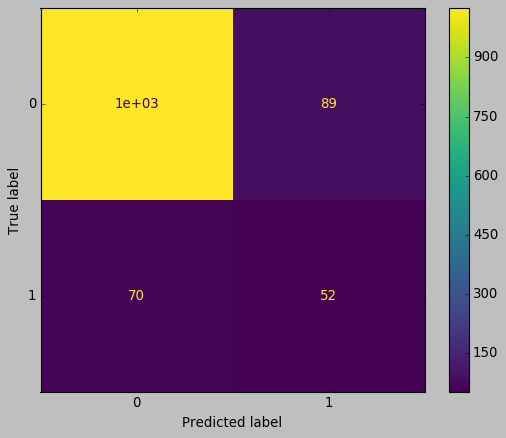

In [52]:
## Ajuste del modelo
model = GaussianNB().fit(X_traindf2, y_traindf2)

## Prediccion con test data
prediccion = model.predict(X_testdf2)

## Reporte de metricas
print(classification_report(y_pred=prediccion, y_true=y_testdf2))

## Matriz de confusion
plot_confusion_matrix(estimator=model, X=X_testdf2, y_true=y_testdf2)
plt.show()

## Respuesta:
Primero realizamos una copia del dataframe y la llamamos df2. De esta nueva dataframe solo dejamos los atributos que estaban implementados en el arbol de la primera pregunta, por lo que nos quedamos con:
('euribor3m','duration','emp.var.rate','loan_yes','housing_yes','cons.price.idx','cons.conf.idx','campaign','age','education_high.school','contact_telephone','nr.employed_3')
Claramente igual dejamos la columna y_yes, pues es lo que se desea predecir.

Posteriormente se realiza el split de la misma forma que para el resto de preguntas, e igualmente se realiza la estandarización.

Es así como aplicamos el modelo de manera default, siendo el conjunto X_traindf2 para fit y el X_testdf2, cabe destacar que estos son iguales a X_train y X_test, con la diferencia que no poseen los atributos que no fueron utilizados en al árbol de decisión. Posteriormente se obtiene el classification report y la matriz de confusión.

Tras observar el output, es evidente el efecto de seleccionar solo los atributos que utilizó el árbol de decisión de la pregunta 1, al momento de utilizar el clasificador Naive Bayes, debido a que pasa de un 14% a un 87% en su accuracy, es decir en su porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test, en este caso llamado X_testdf2. De igual manera este efecto se visualiza a través de la matriz de confusión, donde se observa como ya no comete el error de predecir practicamente todas las entradas como clase 1, igualmente podemos ver como la mayoria de los datos se encuentran en la diagonal deseada, donde el clasificador acierta. Además cabe mencionar que alcanza un desempeño similar al caso extra, donde se buscó el mejor parametro para el modelo y se obtuvo igualmente un 87% en el accuracy.


## Suerte!

In [ ]:
#Gracias!